# Physics 77/88 - Fall 2024 - Homework 7 
## Monte-Carlo Simulation and Numerical Integration
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Nov 7th 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Total: 25P

In the lecture, we showed how a **M**onte-**C**arlo **S**imulation (**MCS**) can be used for estimating $\pi$. A MSC can also be used for estimating an integral numerically, even if the object of which the integral has to be calculated is high dimensional.<br>
<br>
Consider the volume $V$ of a $N$ dimensional *hypersphere* or *N-ball* of radius $R$:<br>
<br>
$V_N(R) = \frac{\pi^{N/2}}{\Gamma(\frac{N}{2}+1)}\,R^N$  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$                    1)<br>
<br>
Here, $\Gamma(x)$ is Euler's gamma function. Note, that for solving the problem, **no knowledge about the gamma function is needed**. In Python, we can import the gamma function via:

In [ ]:
import math
N = 3
Result = math.gamma(N/2 + 1)

As an estimate, the values for the volumes of the following $N$ are:<br>
<br>
$N = 2$: $V =\pi\,R^2 \approx 3.142\,R^2$<br>
$N = 3$: $V = \frac{4}{3}\pi\,R^3 \approx 4.189\,R^3$<br>
$N = 4$: $V \approx 4.935\,R^4$<br>
$N = 5$: $V \approx 5.264\,R^5$<br>
<br>
and so on.<br>
<br>
See also https://en.wikipedia.org/wiki/Volume_of_an_n-ball

The goal of the homework assignment is to learn how to apply a concept that has been introduced during the lecture for a more general case. Also, hyperspheres play an important role in Statistical Physics.  

## Problem 1 (20P)

Write the function **MC_ND_Sphere** using *def* that takes the number $M$ of sampling points, the number of dimensions $N$ and $R$, the radius as input arguments and approximates the volume of a $N$-dimensional hypersphere via a MCS.<br> 
The function should return the approximated **mean value** after 100 runs and the **standard deviation** as well as the **exact value from equation 1)**. You can use the MCS code from the lecture as backbone for your code.<br> 

<br>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


def MC_ND_Sphere(M, N, R = 2):
    
    #exact solution
    V = np.pi**(N/2) * (R**N)/ math.gamma(N/2 + 1)
    
    #numerical solution
    Volumes = np.zeros((100))
    for i in range(100):
        
        Rand = np.random.uniform(-R,R,(M,N))
        
        Radius = 0
        for r in range(N):
            Radius += Rand[:,r]**2
            
        Volumes[i] = (np.sqrt(Radius) < R).sum()/M
        
    V_MC       = Volumes * (2*R)**N
    V_MC_mean  = V_MC.mean()
    V_MC_error = V_MC.std()
    
    return V, V_MC_mean, V_MC_error

## Problem 2 (5P)

Call the function for five or six different values of $N$ using *map*. How do you need to change the number of sampling points in order to maintain **roughly** the same accuracy for the different $N$? Generate a plot of your result. The plot should look similar to:

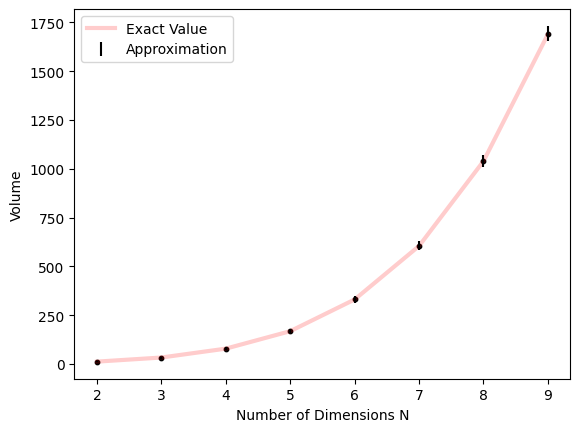

In [23]:
N_array = np.arange(2,10)
M_array = 4**N_array

Res = list(map(MC_ND_Sphere, M_array, N_array))
Res = np.array(Res)

plt.plot(N_array, Res[:,0], '-', c = 'r', linewidth = 3, label = 'Exact Value', alpha = 0.2)
plt.scatter(N_array, Res[:,1], marker = 'o', s = 10, c = 'black')
plt.errorbar(N_array, Res[:,1], Res[:,2], fmt='none', c = 'black', label = 'Approximation')
plt.xlabel('Number of Dimensions N')
plt.ylabel('Volume')
plt.legend()
plt.show()